<a href="https://colab.research.google.com/github/raissalohanna/DataScience-Projects/blob/main/00_PubChem_base_limpa_Ana_EDA_Kulik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PubChem: 'base suja' test

**Problem class:** Regression

**Objective:** Inspect the cleaned dataset and apply the Kulik's regression

## Importing libraries and configuration

In [1]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from rdkit import Chem
import matplotlib.pyplot as plt

In [3]:
from tqdm import tqdm

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
sns.set_theme(style="darkgrid", palette="husl", rc={"figure.figsize":(10, 5)})

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [7]:
df_nonUV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Doutorado/data_output.csv")

In [8]:
df_UV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Doutorado/data_output_uvvis.csv")

### Non-UV data

In [9]:
df_nonUV.head()

,Br count,Cl count,F count,N count,O count,P count,S count,aromatic heteroatom count,aromatic ring count,aromatic total atom count,atom count,canonical smiles,cid,excitations in visible,fst energy,fst energy oscillator,gap,heavy atom count,homo,homo orbital,lumo,max oscillator strength,max oscillator strength energy,max oscillator strength position,molecular weight,total heteroatoms count
0,0,0,0,1,2,0,0,0.0,2.0,10.0,29,CC(C(=O)N)OC1=CC=CC2=CC=CC=C21,17650441,0,4.210240,0.095417,4.625935,16,-6.098071,57,-1.472136,0.429545,5.664795,8,215.24782,3
1,0,1,0,1,2,0,0,0.0,1.0,6.0,26,CC(C(=O)NC)OC1=CC=CC=C1Cl,17650661,0,4.962773,0.027205,5.717112,14,-6.685837,56,-0.968725,0.070237,5.553358,3,213.66078,4
2,0,1,0,1,2,0,0,0.0,2.0,6.0,30,CC(C(=O)NC1CC1)OC2=CC=CC=C2Cl,17650712,0,4.969988,0.030048,5.706227,16,-6.650463,63,-0.944235,0.073594,5.594168,5,239.69806,4
3,0,0,0,1,2,0,0,0.0,1.0,6.0,32,CC1=CC(=C(C=C1)C)OC(C)C(=O)NC,17650795,0,5.003490,0.025696,5.804188,15,-6.315762,56,-0.511574,0.051853,5.620916,4,207.26888,3
4,0,0,0,1,2,0,0,0.0,1.0,6.0,38,CC1=CC(=C(C=C1)C)OC(C)C(=O)NC(C)C,17650797,0,4.935433,0.031251,5.700785,17,-6.010995,64,-0.310210,0.070977,5.541557,4,235.32204,3


In [10]:
df_nonUV.shape

(3369261, 26)

In [11]:
df_nonUV['corante']=0

In [12]:
df_nonUV.columns

Index(['Br count', 'Cl count', 'F count', 'N count', 'O count', 'P count',
       'S count', 'aromatic heteroatom count', 'aromatic ring count',
       'aromatic total atom count', 'atom count', 'canonical smiles', 'cid',
       'excitations in visible', 'fst energy', 'fst energy oscillator', 'gap',
       'heavy atom count', 'homo', 'homo orbital', 'lumo',
       'max oscillator strength', 'max oscillator strength energy',
       'max oscillator strength position', 'molecular weight',
       'total heteroatoms count', 'corante'],
      dtype='object')

### UV data

In [13]:
df_UV.head()

,cid,canonical smiles,heavy atom count,molecular weight,atom count,homo orbital,homo,lumo,gap,fst energy,fst energy oscillator,excitations in visible,max oscillator strength,max oscillator strength energy,max oscillator strength position,N count,O count,F count,P count,S count,Cl count,Br count,total heteroatoms count,aromatic ring count,aromatic total atom count,aromatic heteroatom count
0,17653206,C1=CC2=NSN=C2C(=C1)C(C(=O)O)N,14,209.22508,21,54,-7.077681,-3.156521,3.921161,3.404950,0.054303,2,0.054303,3.404950,1,3,2,0,0,1,0,0,6,2.0,9.0,3.0
1,17653227,C1=CC2=NO[N+](=C2C3=NSN=C31)[O-],13,194.17068,15,49,-7.017816,-3.017743,4.000074,3.594705,0.113922,2,0.113922,3.594705,1,4,2,0,0,1,0,0,7,3.0,12.0,6.0
2,17653228,C1=CC2=NSN=C2C(=C1NCCO)[N+](=O)[O-],16,240.23912,24,62,-6.710328,-3.189174,3.521153,3.245506,0.178657,4,0.178657,3.245506,1,4,3,0,0,1,0,0,8,2.0,9.0,3.0
3,17653229,CNC1=C(C2=NSN=C2C=C1)[N+](=O)[O-],14,210.21314,20,54,-6.574271,-3.072165,3.502105,3.229357,0.171813,4,0.171813,3.229357,1,4,2,0,0,1,0,0,7,2.0,9.0,3.0
4,17653247,CCC(=O)ON=C(C1=NOC(=N1)C)N,14,198.17930,24,52,-6.606924,-1.929287,4.677637,4.161250,0.090690,1,0.090690,4.161250,1,4,3,0,0,0,0,0,7,1.0,5.0,3.0


In [14]:
df_UV.shape

(1048465, 26)

In [15]:
df_UV['corante']=1

In [16]:
df_UV.columns

Index(['cid', 'canonical smiles', 'heavy atom count', 'molecular weight',
       'atom count', 'homo orbital', 'homo', 'lumo', 'gap', 'fst energy',
       'fst energy oscillator', 'excitations in visible',
       'max oscillator strength', 'max oscillator strength energy',
       'max oscillator strength position', 'N count', 'O count', 'F count',
       'P count', 'S count', 'Cl count', 'Br count', 'total heteroatoms count',
       'aromatic ring count', 'aromatic total atom count',
       'aromatic heteroatom count', 'corante'],
      dtype='object')

Rearranging the columns of the non-UV according to the UV dataset, in order to concatenate both of them

In [17]:
df_nonUV = df_nonUV [['cid', 'canonical smiles', 'heavy atom count', 'molecular weight',
       'atom count', 'homo orbital', 'homo', 'lumo', 'gap', 'fst energy',
       'fst energy oscillator', 'excitations in visible',
       'max oscillator strength', 'max oscillator strength energy',
       'max oscillator strength position', 'N count', 'O count', 'F count',
       'P count', 'S count', 'Cl count', 'Br count', 'total heteroatoms count',
       'aromatic ring count', 'aromatic total atom count',
       'aromatic heteroatom count', 'corante']]

Concatenating the datasets:

In [18]:
df_full = pd.concat([df_nonUV, df_UV], ignore_index=True)

In [19]:
df_full.shape

(4417726, 27)

In [20]:
df_full.head()

,cid,canonical smiles,heavy atom count,molecular weight,atom count,homo orbital,homo,lumo,gap,fst energy,fst energy oscillator,excitations in visible,max oscillator strength,max oscillator strength energy,max oscillator strength position,N count,O count,F count,P count,S count,Cl count,Br count,total heteroatoms count,aromatic ring count,aromatic total atom count,aromatic heteroatom count,corante
0,17650441,CC(C(=O)N)OC1=CC=CC2=CC=CC=C21,16,215.24782,29,57,-6.098071,-1.472136,4.625935,4.210240,0.095417,0,0.429545,5.664795,8,1,2,0,0,0,0,0,3,2.0,10.0,0.0,0
1,17650661,CC(C(=O)NC)OC1=CC=CC=C1Cl,14,213.66078,26,56,-6.685837,-0.968725,5.717112,4.962773,0.027205,0,0.070237,5.553358,3,1,2,0,0,0,1,0,4,1.0,6.0,0.0,0
2,17650712,CC(C(=O)NC1CC1)OC2=CC=CC=C2Cl,16,239.69806,30,63,-6.650463,-0.944235,5.706227,4.969988,0.030048,0,0.073594,5.594168,5,1,2,0,0,0,1,0,4,2.0,6.0,0.0,0
3,17650795,CC1=CC(=C(C=C1)C)OC(C)C(=O)NC,15,207.26888,32,56,-6.315762,-0.511574,5.804188,5.003490,0.025696,0,0.051853,5.620916,4,1,2,0,0,0,0,0,3,1.0,6.0,0.0,0
4,17650797,CC1=CC(=C(C=C1)C)OC(C)C(=O)NC(C)C,17,235.32204,38,64,-6.010995,-0.310210,5.700785,4.935433,0.031251,0,0.070977,5.541557,4,1,2,0,0,0,0,0,3,1.0,6.0,0.0,0


In [21]:
df_full.dtypes

cid                                   int64
canonical smiles                     object
heavy atom count                      int64
molecular weight                    float64
atom count                            int64
homo orbital                          int64
homo                                float64
lumo                                float64
gap                                 float64
fst energy                          float64
fst energy oscillator               float64
excitations in visible                int64
max oscillator strength             float64
max oscillator strength energy      float64
max oscillator strength position      int64
N count                               int64
O count                               int64
F count                               int64
P count                               int64
S count                               int64
Cl count                              int64
Br count                              int64
total heteroatoms count         

In [22]:
df_full.isnull().sum()

cid                                     0
canonical smiles                        6
heavy atom count                        0
molecular weight                        0
atom count                              0
homo orbital                            0
homo                                    0
lumo                                    0
gap                                     0
fst energy                              0
fst energy oscillator                   2
excitations in visible                  0
max oscillator strength                 0
max oscillator strength energy          0
max oscillator strength position        0
N count                                 0
O count                                 0
F count                                 0
P count                                 0
S count                                 0
Cl count                                0
Br count                                0
total heteroatoms count                 0
aromatic ring count               

## EDA (exploratory data analysis)

### Class imbalance

Initially, we have aroung 75% of dyes in our dataset.

<AxesSubplot:>

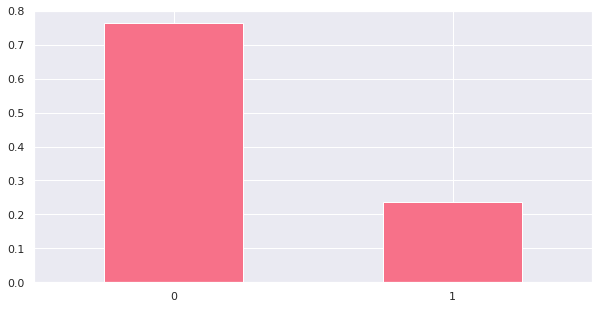

In [23]:
df_full['corante'].value_counts(normalize=True).plot.bar(rot=0)

In [24]:
df_full['corante'].value_counts()

0    3369261
1    1048465
Name: corante, dtype: int64

### Null data

Dropping the "null" values in aromtics descriptors (which may be zero aromaticity but also may be en error of RDKit)

In [25]:
df_full.dropna(subset=['aromatic ring count', 'aromatic total atom count', 'aromatic heteroatom count'], inplace=True)

Other data though are of main importance for our calculations, as the `First energy oscillator`, so we will drop these rows

In [26]:
df_full.dropna(subset=['fst energy oscillator'], inplace=True)

Obviouslly, we will drop also null smiles:

In [27]:
df_full.dropna(subset=['canonical smiles'], inplace=True)

For some reason, we still have some data from `fst energy oscillator` that didn't appear before. Let's discard it too:

In [28]:
df_full[df_full['fst energy oscillator']==0].shape

(9702, 27)

In [ ]:
df_full = df_full[df_full['fst energy oscillator']!=0]

### Duplicated CID and SMILES

In [30]:
df_full[df_full.duplicated(subset='cid')==True].shape

(1018840, 27)

Ops! Seems like we have some duplicated CIDs. Let's see the proportion of dyes and non-dyes:|

In [32]:
df_full[df_full.duplicated(subset='cid', keep=False)==True]['corante'].value_counts()

0    1018840
1    1018839
Name: corante, dtype: int64

Seems like we have some isomers here!!

As we already have an imbalance regarding dye/non-dye distributions, let us keep the isomers that are classified as dyes, in order to not further increase this imbalance

In [33]:
df_full.drop_duplicates(subset='cid', keep='last', inplace=True, ignore_index=True)

We may still have some duplicated smiles with different cids..

In [34]:
df_full[df_full.duplicated(subset='canonical smiles')==True].shape

(258267, 27)

In [35]:
df_full[df_full.duplicated(subset='canonical smiles')==True]['corante'].value_counts()

0    183188
1     75079
Name: corante, dtype: int64

Again, in order to reduce the imbalance of dyes/non-dyes, let's drop the first occurrences:

In [36]:
df_full.drop_duplicates(subset='canonical smiles', keep='last', inplace=True, ignore_index=True)

### Sanity check 

This regards some information that may not make sense, such as molecular weight = 0

Molecular weight:

In [37]:
#(rows, cols)
df_full[df_full['molecular weight']==0].shape

(15, 27)

In [38]:
#dropping
df_full = df_full[df_full['molecular weight']!=0]

Cid:

In [39]:
#(rows, cols)
df_full[df_full['cid']==0].shape

(1, 27)

In [40]:
#dropping
df_full = df_full[df_full['cid']!=0]

Atom count:

In [41]:
df_full[df_full['atom count']==0].shape

(0, 27)

Gap:

In [42]:
df_full[df_full['gap']==0].shape

(0, 27)

Regarding levels of energy and oscillation strengths, should we keep these data? Does it make sense?

In [43]:
df_full[df_full['homo']==0].shape

(9, 27)

In [44]:
df_full[df_full['lumo']==0].shape

(3709, 27)

Our class imbalance is still the same! Weird..

<AxesSubplot:>

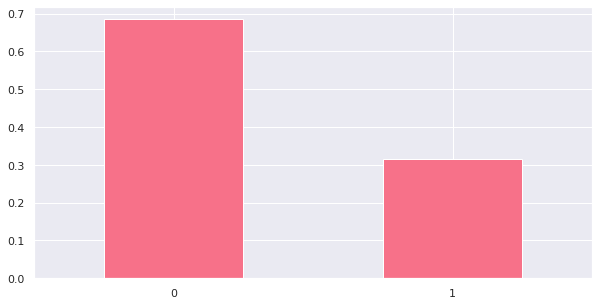

In [45]:
df_full['corante'].value_counts(normalize=True).plot.bar(rot=0)

In [46]:
df_full['corante'].value_counts()

0    2117922
1     975694
Name: corante, dtype: int64

### Graphical distributions

In [ ]:
fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Atomic properties', y=1.1, weight='bold')

# Plot 1: heavy atom count
ax1 = df_full['heavy atom count'].plot.hist(ax=ax1, bins=15)
ax1.set_title('heavy atom count', weight='bold')

# Plot 2: molecular weight
ax2 = df_full['molecular weight'].plot.hist(ax=ax2, bins=15)
ax2.set_title('molecular weight', weight='bold')

# Plot 3: atom count
ax3 = df_full['atom count'].plot.hist(ax=ax3, bins=15)
ax3.set_title('atom count', weight='bold')

In [ ]:
fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Energy properties', y=1.1, weight='bold')

# Plot 1: homo distribution
ax1 = df_full['homo'].plot.hist(ax=ax1, bins=20)
ax1.set_title('homo [eV]', weight='bold')

# Plot 2: lumo distribution
ax2 = df_full['lumo'].plot.hist(ax=ax2, bins=20)
ax2.set_title('lumo [eV]', weight='bold')

# Plot 3: gap distribution
ax3 = df_full['gap'].plot.hist(ax=ax3, bins=50)
ax3.set_title('gap [eV]', weight='bold')

In [ ]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,4))
fig.suptitle('Aromatic properties', y=1.1, weight='bold')

# Plot 1: total heteroatoms count distribution
ax1 = df_full['total heteroatoms count'].plot.hist(ax=ax1)
ax1.set_title('total heteroatoms count', weight='bold', y=1.05)

# Plot 2: aromatic ring count distribution
ax2 = df_full['aromatic ring count'].plot.hist(ax=ax2)
ax2.set_title('aromatic ring count', weight='bold', y=1.05)

# Plot 3: aromatic total atom count distribution
ax3 = df_full['aromatic total atom count'].plot.hist(ax=ax3)
ax3.set_title('aromatic total atom count', weight='bold', y=1.05)

# Plot 4: aromatic heteroatom count distribution
ax4 = df_full['aromatic heteroatom count'].plot.hist(ax=ax4)
ax4.set_title('aromatic heteroatom count', weight='bold', y=1.05)

In [ ]:
fig,(ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Main excitation properties', y=1.1, weight='bold')

# Plot 1: fst energy distribution
ax1 = df_full['fst energy'].plot.hist(ax=ax1, bins=20)
ax1.set_title('fst energy [eV]', weight='bold')

# Plot 2: fst energy oscillator distribution
ax2 = df_full['fst energy oscillator'].plot.hist(ax=ax2, bins=20)
ax2.set_title('fst energy oscillator', weight='bold')

# Plot 3: excitations in visible (class imbalance)
ax3 = df_full['excitations in visible'].plot.hist(ax=ax3)
ax3.set_title('excitations in visible', weight='bold')

## Removing molecules that can't be read by RDKit 

In [ ]:
def test_molecules(smiles):
    
    try:
        # Criar a estrutura a partir do SMILES da molécula, adicionando os H faltantes
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
    
        return 'Y'
    
    except:
        
        return 'N'
    

In [ ]:
%%timeit

df_full['RDKit readable'] = df_full['canonical smiles'].apply(lambda x: test_molecules(smiles=x))

Now, let's check the amount of molecules that could not be converted:

In [ ]:
df_full['RDKit readable'].value_counts(normalize=True).plot.bar(rot=0)

As we have some smiles that can't be converted into mol objects (less than 1%), let us drop them:

In [ ]:
df_full = df_full[df_full['RDKit readable']=='Y']

## Applying the Kulik's decriptor

Equação (https://pubs.acs.org/doi/full/10.1021/ja401184g):

$P_d = \sum_i \sum_j P_i P_j \delta(d - d_{ij})$


Importing the elements database

In [ ]:
elem_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Doutorado/Atomic properties DB.csv')

In [ ]:
elem_data.head()

In [ ]:
elem_data.dtypes

Fixing null data and type of objects

In [ ]:
elem_data['Electronegativity (Pauling)'] = np.where( 
    ( elem_data['Electronegativity (Pauling)']=='—'), np.NaN, elem_data['Electronegativity (Pauling)'])

elem_data['Atomic Radii (pm)'] = np.where( 
    ( elem_data['Atomic Radii (pm)']=='—'), np.NaN, elem_data['Atomic Radii (pm)'])

elem_data['Van der Waals Radii (pm)'] = np.where( 
    ( elem_data['Van der Waals Radii (pm)']=='—'), np.NaN, elem_data['Van der Waals Radii (pm)'])

elem_data['Valence electrons'] = np.where( 
    ( elem_data['Valence electrons']=='—'), np.NaN, elem_data['Valence electrons'])

In [ ]:
float_data = ['Electronegativity (Pauling)', 'Atomic Radii (pm)', 'Van der Waals Radii (pm)']

elem_data[float_data] = elem_data[float_data].astype(float)

In [ ]:
elem_data.dtypes

In [ ]:
#Converting the df into a dictionary to be used in the Kulik's descriptor

'''
    Converting DataFrame to Dicionary using a COLUMN as KEY, in the format:
    
    prop: {<ELEMENT_1>: (prop1, prop2, prop3,...),
            <ELEMENT_2>: (prop1, prop2, prop3,...),...
            }
    
    Lengh of list of properties: 10
    
    Index of each property:
    
        0: index
        1: Z
        2: Name
        3: Average atomic mass
        4: Electronegativity (Pauling)
        5: First Ionization Energy (eV)
        6: Atomic Radii (pm)
        7: Van der Waals Radii (pm)
        8: Covalent Radii (pm)
        9: Valence electrons 
'''

properties_dict = elem_data.set_index('Symbol').T.to_dict('list')

#### Applying the Kulik's descriptor

In [ ]:
def create_property_descriptors(smiles, depth, prop, prop_index=0):
    '''
    Função:
        create_property_descriptors(smiles, depth, prop, prop_index=0)
    
    Descrição:
        Permite criar descritores baseados em propriedades atômicas e conectividade básica entre os átomos

    Argumentos:
        smiles:     string SMILES da molécula que se deseja gerar os descritores. Exemplo: 'C(C)CO'.
        depth:      profundidade, parâmetro que permite definir o nivel máximo de conectividade que será 
                    usado na geração dos descritores. Exemplo, se depth=3, três descritores serão gerados,
                    com conectividade iguais a um, dois e três.
        prop:       dicionário formado por pares 'átomo': propriedade ou 'átomo':[propriedades] ou 
                    'átomo':(propriedades).
        prop_index: índice da propriedade de interesse nos valores de 'prop'. Se estes valores não forem
                    listas ou tuplas, este parâmetro é ignorado. Se forem, este parâmetro deve ser
                    configurado com um número maior ou igual a zero e menor do que o número de itens nas
                    listas ou tuplas. O valor default deste parâmetro é zero, ou seja, a função pegará a
                    primeira propriedade da lista.
    '''
    # Criar a estrutura a partir do SMILES da molécula, adicionando os H faltantes
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Preparar listas de resultados (separação por depth=0, 1, 2, 3...)
    result_list = [0] * (depth+1) # Se depth = 2, precisamos de 3 itens (para d=[0,1,2])
      
    # Obter a matriz de distâncias entre cada um dos átomos e a lista de átomos
    atom_list = [ atom.GetSymbol() for atom in mol.GetAtoms() ]
    n_atoms = len(atom_list)
    dist_matrix = np.tril(Chem.rdmolops.GetDistanceMatrix(mol, force=True))
        
    # Iterar toda a matriz, extraindo os dados de interesse e separando por valor de depth
    for i in range(0, n_atoms):
        for j in range(0, n_atoms):
            d = int(dist_matrix[i][j])
            
            if d <= depth and d == 0 and i == j:
                a_i = atom_list[i]
                p_i = 0
                
                if prop[a_i] is list or tuple:  
                    p_i = prop[a_i][prop_index]   # caso haja + de 1 propriedade p/ calcular
                    
                else:
                    p_i = prop[a_i]            # caso haja somente 1 propriedade p/ calcular
                    
                result_list[d] += round(p_i * p_i, 3)
            
            if d <= depth and d > 0:
                a_i = atom_list[i]
                a_j = atom_list[j]
                p_i, p_j = 0, 0
                
                if prop[a_i] is list or tuple:  
                    p_i = prop[a_i][prop_index]   # caso haja + de 1 propriedade p/ calcular
                else:
                    p_i = prop[a_i]            # caso haja somente 1 propriedade p/ calcular
                if prop[a_j] is list or tuple:
                    p_j = prop[a_j][prop_index]
                else:
                    p_j = prop[a_j]
                result_list[d] += round(p_i * p_j, 3)    # posição [d] na lista de resultados é incrementada
    
    # Finalizando
    return result_list

**Property 3: Electronegativity (Pauling)**

In [ ]:
df_full.assign(Kulik_electronegativity=lambda x: create_property_descriptors(smiles=x, depth=3, prop=properties_dict, prop_index=3))

**NÃO RODAR DAQUI EM DIANTE!**

In [ ]:
df_full.assign(Kulik_electronegativity=lambda x: create_property_descriptors(smiles=x, depth=3, prop=properties_dict, prop_index=3))
df_full.assign(Kulik_1st_ionization_energyy=lambda x: create_property_descriptors(smiles=x, depth=3, prop=properties_dict, prop_index=4))
df_full.assign(Kulik_atomic_radii=lambda x: create_property_descriptors(smiles=x, depth=3, prop=properties_dict, prop_index=5))
df_full.assign(Kulik_van_der_waals_radii=lambda x: create_property_descriptors(smiles=x, depth=3, prop=properties_dict, prop_index=6))
df_full.assign(Kulik_covalent_radii=lambda x: create_property_descriptors(smiles=x, depth=3, prop=properties_dict, prop_index=7))
df_full.assign(Kulik_valence_e=lambda x: create_property_descriptors(smiles=x, depth=3, prop=properties_dict, prop_index=8))


Saving data:

In [ ]:
df_full.to_csv("data_outputs_w_kulik.csv")